### MODLE DE MACHINE LEARNING POUR LA PREDICTION DE SURVIE D'UN PASSAGER LORS DU NAUFRAGE DU TITANIC  




### Installation des modules nécessaires pour créer notre modèle  

In [47]:
!pip3 install seaborn 
!pip3 install pandas
!pip3 install matplotlib 
!pip3 install -U scikit-learn 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [50]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

###  Collection et traitement  des données pour notre modèle 

In [11]:
titanic = pd.read_csv('train.csv')

titanic.head() # permet de voir les features de notre dataset 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic.shape # permet de compter les données dans notre dataset 

(891, 12)

In [13]:
titanic.info() # donne plus d'informations sur chaque colones 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
titanic.isnull().sum() #check le nombre de valeur manquante par feature 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling missing data 
Nous avons deux features avec des valeurs maquantes. 
    - La colone Embarquet 
    - La colone age 
    - La colone cabine 
    
 ##### Dans un premier temps nous allons supprimer la colone cabine 
 
    Maintenant Essayons d'étudier un peu en profondeur notre dataset 

In [16]:
# suppression de la colone "cabin" dans notre dataframe 

titanic =  titanic.drop(columns='Cabin' , axis=1) 

In [38]:
# on remplace les données de la colonne manquante par la moyenne des données 

titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [39]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [40]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

## Data visualisation

<AxesSubplot:xlabel='Survived', ylabel='count'>

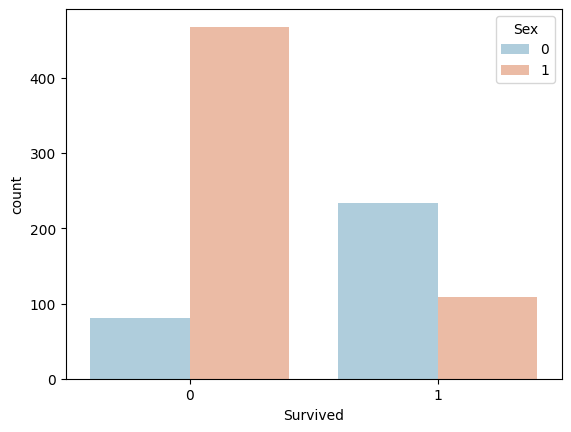

In [41]:
# on regarde le nombre de personne qui ont survécu en fonction de leur sexe 

sns.set_style='whitegrid'

sns.countplot(x='Survived', hue='Sex', palette='RdBu_r' , data=titanic)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

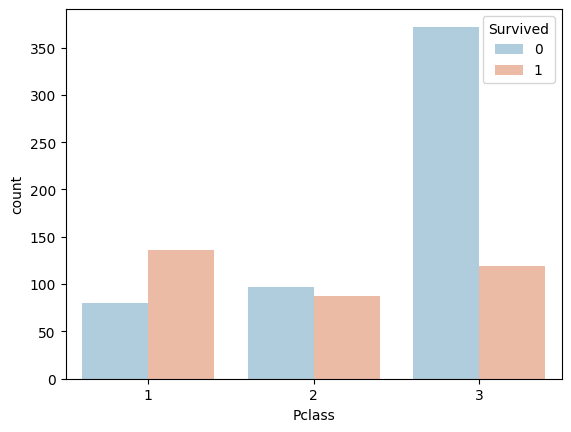

In [42]:
# on regarde le nombre de personne qui ont survécu en fonction de leur classe 

sns.countplot(x='Pclass', hue='Survived', palette='RdBu_r' , data=titanic)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

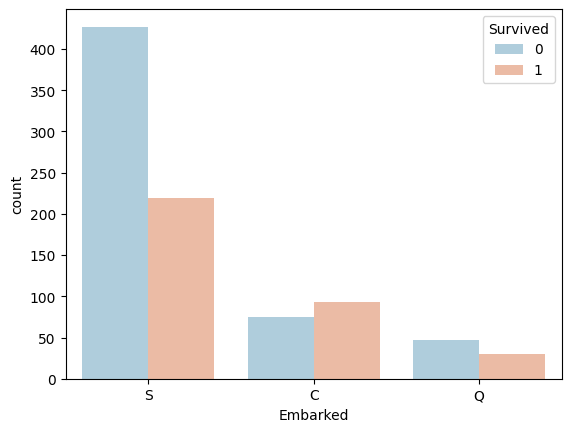

In [30]:
# on regarde le nombre de personne qui ont survécu en fonction de leur age

sns.countplot(x='Embarked', hue='Survived', palette='RdBu_r' , data=titanic)

## Remplacer les données des valeurs catégorielles 

In [43]:
# on remplace les valeurs catégorielles. 
titanic.replace({'Sex': {'male': 1 , 'female' : 0} , 'Embarked': {'S': 0, 'C' : 1 , 'Q' : 2}}, inplace=True)

In [44]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


### On suprime les columns inutiles 

    On netoie notre dataframe en supprimant les colones Name, PasssengerId , Survived, 

In [56]:
X = titanic.drop(columns = ['PassengerId' , 'Name' , 'Survived' , 'Ticket'], axis=1)
Y = titanic['Survived']

In [57]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         0
1         1    0  38.000000      1      0  71.2833         1
2         3    0  26.000000      0      0   7.9250         0
3         1    0  35.000000      1      0  53.1000         0
4         3    1  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         0
887       1    0  19.000000      0      0  30.0000         0
888       3    0  29.699118      1      2  23.4500         0
889       1    1  26.000000      0      0  30.0000         1
890       3    1  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [58]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
### On fractionne les données en données de test et données d'apprentissage 

In [59]:
X_train , X_test , Y_train, Y_test =  train_test_split(X, Y , test_size=0.2 , random_state=2)

### On entraine notre modèle 

    On va utilsier la regression logistique. 

In [60]:
model = LogisticRegression() 

In [61]:
# on entraine notre modèle de regression logistique avec les données d'entrainement 

model.fit(X_train, Y_train)

/home/silone/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Acuracy score 

In [62]:
X_train_prediction = model.predict(X_train) 

In [63]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [67]:
 training_datai_accuracy = accuracy_score(Y_train, X_train_prediction)
    
print('The accuracy of the training data is :', training_datai_accuracy)

The accuracy of the training data is : 0.8117977528089888
